## TensorFlow & Keras

TensorFlow = Tensor + Flow

TensorFlow is an open-source library for numerical computation originally developed by researchers and engineers working at the Google Brain team. It was originally built as a proprietary machine learning system based on deep learning neural networks.

TensorFlow is made up of two words tensor and flow where Tensor is a multidimensional array and Flow is a graph of operations. Internally, TensorFlow implements machine learning algorithms as a graph of operations on multidimensional array. Tensor is a container for data to store numerical data (almost always) and are a generalization of matrices to an arbitrary number of dimensions which are also called as axis or rank. A tensor is defined by three key attributes:

a) Number of axis or ranks ndim

b) Shape shape

c) Data type dtype

In [1]:
import tensorflow as tf
import numpy as np
import datetime, os

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check the version
tf.__version__

'2.11.0'

tf.constant

In [3]:
# Create a constant tensor A
A = tf.constant([[3, 2],
                 [5, 2]])

In [4]:
print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [5]:
A.shape

TensorShape([2, 2])

In [6]:
A.dtype

tf.int32

In [7]:
A.ndim

2

In [8]:
A.numpy()

array([[3, 2],
       [5, 2]], dtype=int32)

tf.variable

In [9]:
# Create a Variable tensor V
V = tf.Variable([[3, 2],
                 [5, 2]])

In [10]:
print(V.numpy())

[[3 2]
 [5 2]]


In [11]:
# Create another tensor B
B = tf.constant([[9, 5],
                 [1, 3]])

In [12]:
print(B.numpy())

[[9 5]
 [1 3]]


## tf.concat

In [13]:
# Concatenate columns
AB_col_concate = tf.concat(values=[A, B], axis=1)

In [14]:
# Concatenate columns
AB_col_concate = tf.concat(values=[A, B], axis=1)

In [15]:
AB_col_concate

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[3, 2, 9, 5],
       [5, 2, 1, 3]], dtype=int32)>

In [16]:
# Concatenate rows
AB_row_concate = tf.concat(values=[A, B], axis=0)
AB_row_concate

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[3, 2],
       [5, 2],
       [9, 5],
       [1, 3]], dtype=int32)>

## tf.zeros

In [17]:
# Tensor filled with zeros
tf_zeros = tf.zeros(shape=[3, 4], dtype=tf.int32)

In [18]:
tf_zeros

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)>

### tf.ones

In [19]:
# Tensor filled with ones
tf_ones = tf.ones(shape=[5, 3], dtype=tf.float32)

In [20]:
tf_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

### tf.reshape

In [21]:
# Reshape the tensor 
reshaped = tf.reshape(tensor = AB_col_concate, shape = [1, 8])
reshaped.numpy()

array([[3, 2, 9, 5, 5, 2, 1, 3]], dtype=int32)

## Linear Algebra Operations

### tf.transpose

In [22]:
A.numpy()

array([[3, 2],
       [5, 2]], dtype=int32)

In [23]:
# Tranpose tensor
tf.transpose(A).numpy()

array([[3, 5],
       [2, 2]], dtype=int32)

### tf.matmul. Matrix multiplication

In [24]:
# Define vector v
v = tf.constant([[5], [2]])

In [25]:
# Matrix multiplication 
tf.matmul(A, v).numpy()

array([[19],
       [29]], dtype=int32)

### tf.multiply

Element-wise multiplication

### Identity Matrix

In [26]:
# Get the rows and columns
rows, cols = (3,3)

In [27]:
# Create identity matrix
tf_identity = tf.eye(num_rows = rows,
                    num_columns = cols,
                    dtype = tf.float64)

tf_identity.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### tf.linalg.det

The determinant of the maxtrix or tensor. tf.linalg.det does not take integers as input.

In [28]:
# Determinant of tensor 
A.numpy()

array([[3, 2],
       [5, 2]], dtype=int32)

In [29]:
tf.linalg.det(tf.cast(A, tf.float64)).numpy()

-4.0

### tf.tensordot

Calculating the dot product of one tensor onto another is one of the most common linear algebra operations.

In [30]:
A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 2],
       [5, 2]], dtype=int32)>

In [31]:
B

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9, 5],
       [1, 3]], dtype=int32)>

In [32]:
# Dot product
tf.tensordot(a=A, b=B, axes=1).numpy()

array([[29, 21],
       [47, 31]], dtype=int32)

In [33]:
# Matrix multiplication of A and B
tf.matmul(A, B).numpy()

array([[29, 21],
       [47, 31]], dtype=int32)

### Gradient Calculation

Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape tf.GradientTape for computing gradients. When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards.

Example 1

In [34]:
# Initialize a variable
x = tf.Variable(5.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
    y = x ** 3 +8
    
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 75.0

In [35]:
print(f'{dy_dx} is the gradient of y=x^3 with x={x.numpy()}')

75.0 is the gradient of y=x^3 with x=5.0


Let's define a loss function 

 for which we'll minimize the loss function with automatic differentiation and stochastic gradient descent. We will run SGD for a number of iterations and compute

(a) the loss at each iteration
(b) the derivative of the loss with respect to 

We then update the SGD.

Initializing yhat=[[-0.05026075]]


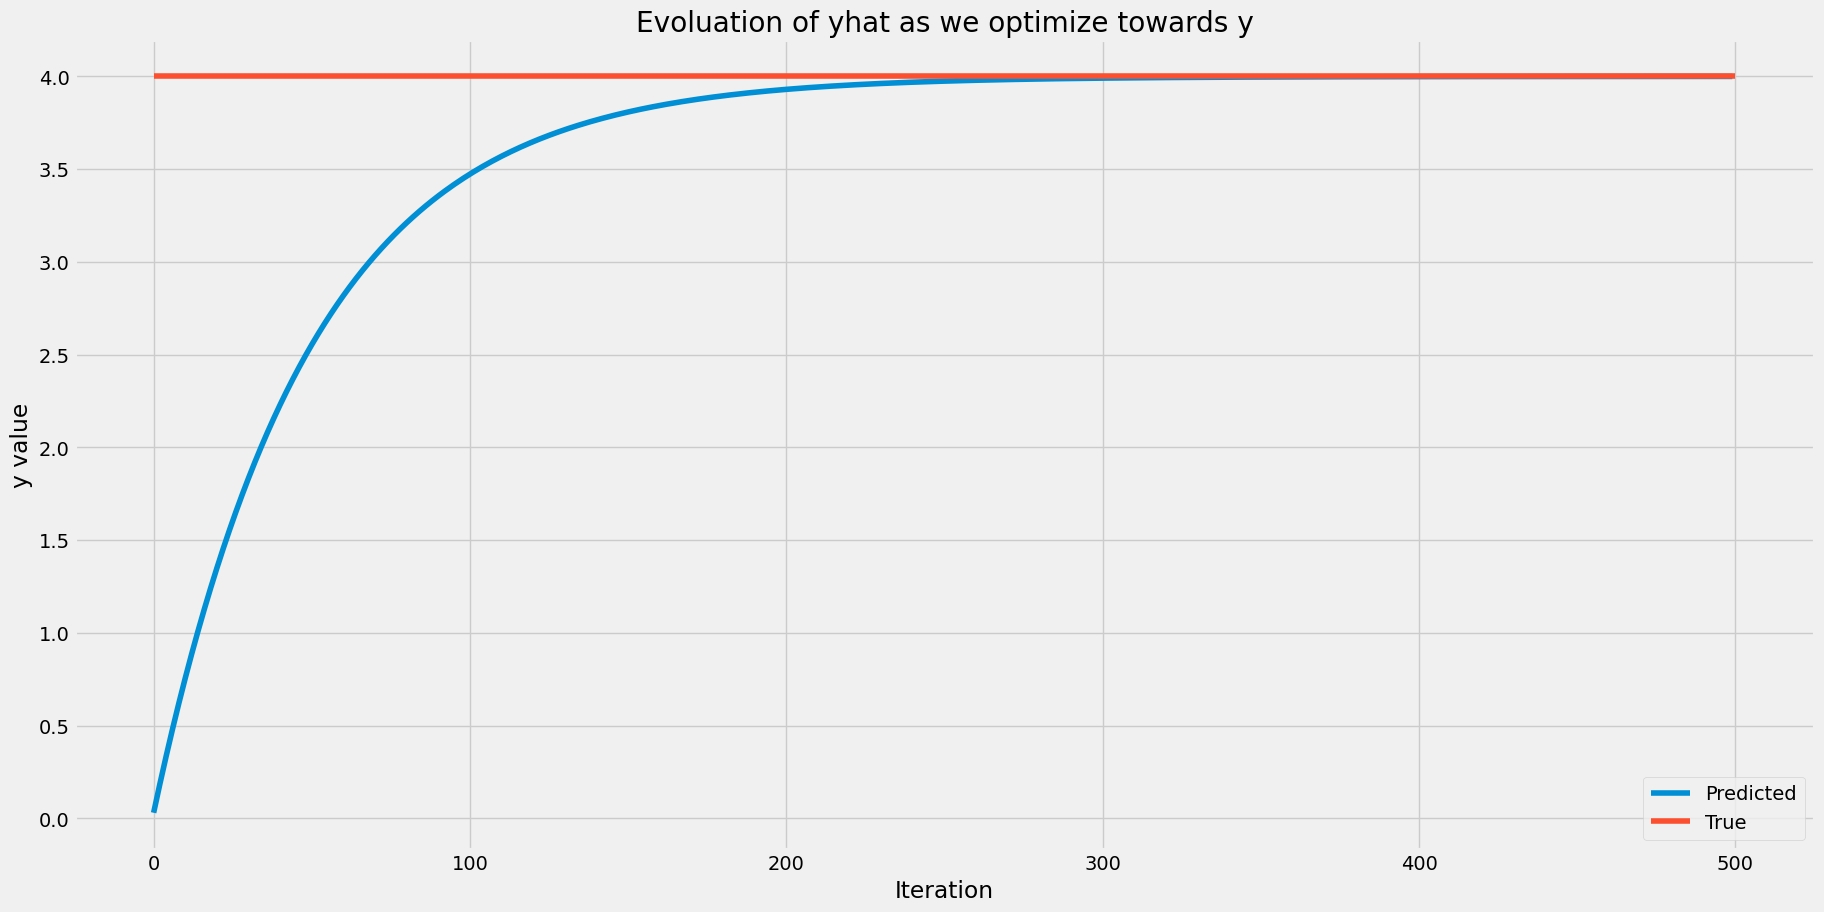

In [36]:
# Initialize a random value x
yhat = tf.Variable([tf.random.normal([1])])
print(f'Initializing yhat={yhat.numpy()}')

learning_rate = 1e-2                            # learning rate for SGD
result = []
y = 4                                           # Define the target value

# Compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
    with tf.GradientTape() as tape:
        loss = (yhat - y)**2 

    # loss minimization using gradient tape
    grad = tape.gradient(loss, yhat)
    new_yhat = yhat - learning_rate*grad        # sgd update
    yhat.assign(new_yhat)                       # update the value of f(x)
    result.append(yhat.numpy()[0])

# Plot the evolution of yhat as we optimize towards y
plt.figure(figsize=(20,10))

plt.plot(result)
plt.plot([0, 500],[y,y])

plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('y value')
plt.title('Evoluation of yhat as we optimize towards y');

TensorBoard

TensorBoard is a browser-based visualization tool that let you monitor models during training and gives access to the following features

Visually monitoring metrics during training
Visualizing your model architecture
Visualizing histograms of activations and gradients

In [37]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [38]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [39]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
  ])

In [40]:
def train_model():
    
    model = create_model()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # two extra line of code
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tb_callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)]    
    
    model.fit(x=x_train, y=y_train, epochs=5, validation_data=(x_test, y_test), callbacks=tb_callbacks)

train_model()

Epoch 1/5


2023-03-02 22:03:55.039952: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4963 - accuracy: 0.8220 - val_loss: 0.4232 - val_accuracy: 0.8523
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3827 - accuracy: 0.8599 - val_loss: 0.3826 - val_accuracy: 0.8591
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3499 - accuracy: 0.8717 - val_loss: 0.3590 - val_accuracy: 0.8713
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3285 - accuracy: 0.8799 - val_loss: 0.3547 - val_accuracy: 0.8752
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3099 - accuracy: 0.8855 - val_loss: 0.3663 - val_accuracy: 0.8636


In [41]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [42]:
%tensorboard --logdir logs

The Scalars dashboard shows how the loss and metrics change with every epoch. You can use it to also track training speed, learning rate, and other scalar values. 

The Graphs dashboard helps you visualize your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly. 

The Distributions and Histograms dashboards show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way.

Keras

Keras is a deep learning API for Python and is one of the most powerful and easy to use library which runs on top of popular libraries like TensorFlow and Theano for creating deep learning models. It was originally created and developed by Google AI Developer/Researcher, Francois Chollet to facilitate his own research and experiement. He committed and released the first version of Keras to his GitHub on March 2015.

Originally, Keras’ default backend was Theano. At the same time, Google had released TensorFlow. Given the synergies, Keras started supporting TensorFlow as a backend, and slowly TensorFlow became the most popular backend, resulting in TensorFlow being the default backend starting from the release of Keras v1.1.0.

Deep Learning Software and Harware Stack

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, which is a linear stack of layers. For more complex architectures, we should use the Keras functional API, which allows to build arbitrary graphs of layers.

Keras is ideal for prototyping simple concepts and comes with a large community support. Refer here for Keras API.
Keras Installation

Refer here for installation of latest version of Keras. The current release of Keras is 2.4.0, which simply redirects to tf.keras.

In [43]:
import keras
keras.__version__

'2.11.0'

In [44]:
from tensorflow.keras.models import Sequential
#from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mean_squared_error')

X = np.array([-1.0,0.0,1.0,2.0,3.0,4.0])
y = np.array([-3.,-1.,1.,3.,5.,7.])

model.fit(X, y, epochs=100,verbose=0)
print(model.predict([10.0]))

1/1 [==============================] - 0s 39ms/step
[[18.020811]]


In [46]:
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
model = Sequential()

# First layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

# Second layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Third layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())

# Fourth layer
model.add(Dense(64, activation='relu'))

# Fifth layer : output
model.add(Dense(10, activation='softmax'))


In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [49]:
# reshape training data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

# reshape test data
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

# convert class vector (int) to binary class matrix
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [56]:
%%time
# fit or train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,verbose=1)

CPU times: user 3min 22s, sys: 42.8 s, total: 4min 5s
Wall time: 49.6 s


In [60]:
# import cufflinks as cf
# import pandas as pd
# pd.DataFrame(history.history).iplot()

In [50]:
# measure loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9910


0.9909999966621399

In [51]:
# save model for future use
model.save('mnist_model.h5')